# Aula_OSMnx_2023
##### Professora: Flavia Lopes (PhD / Dra.)

## Parte 1

#### 1. Introdução OSMnx;
#### 2. Introdução OSM;
#### 3. Introdução NetworkX;
#### 4. Instalação OSMnx;
#### 5. Possibilidades OSMnx;
- lugares
- rede de ruas
- transporte público
- lotes
- edifícios
#### 6. Limitações OSMnx;
#### 7. Exercício.

## Parte 2

### O que é Osmnx?

##### - O OSMnx é uma biblioteca fonte aberta (open-source) em Python que permite baixar, modelar, analisar e visualizar facilmente redes de ruas, redes de transporte público, lotes, edifícios e diversas outras características geoespaciais das cidades. Os dados são extraídos da base de dados do OpenStreetMap. As análises espaciais são suportadas por allgoritmos da biblioteca NetworkX;

##### - O nome "OSMnx" é uma abreviação de "OpenStreetMap Networkx";

##### -  Criada por Geoff Boeing (University of Southern California);

##### -  Lançada em 2017.

###### Para mais detalhes ver: Boeing, G. 2017. **“OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks.”** Computers, Environment and Urban Systems. 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004
[link](https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks)




### O que é OpenStreetMap?

##### - O OpenStreetMap (OSM) é um projeto colaborativo de mapeamento digital que cria e fornece dados geoespaciais livres e editáveis para qualquer pessoa que queira utilizá-los;
##### - Os mapas do OpenStreetMap contêm informações detalhadas sobre rede de ruas, usos do solo e outras características geoespaciais. Tudo alimentado por usuários;
##### - Os dados do OSM podem ser utilizados, modificados e compartilhados gratuitamente;
##### - Lançado em 2004.

[link](https://www.openstreetmap.org/#map=5/62.994/17.637)

### O que é NetworkX?

##### - O NetworkX é uma biblioteca em Python para a criação, análise e visualização de estruturas de redes (grafos).
##### - Grafos são representações matemáticas de relações entre objetos, e eles consistem em nós (ou vértices) conectados por arestas (ou arestas).

[link](https://networkx.org/)

####  Vale salientar que não é obrigatório o uso da biblioteca NetworkX (ou seja, fazer análises). Você pode utilizar o OSMnx apenas para visualização, ou criação de mapas
####  A ferramenta é um ótimo suporte tanto para pesquisas qualitativas quanto quantitativas

## Parte 3

#### - Instalação OSMnx
##### - Conda
*conda create -n ox -c conda-forge --strict-channel-priority osmnx*
##### - Pip
*.\python -m pip install osmnx-1.3.0-py3-none-any.whl* **(prestar atenção! Algumas vezes instalar pelo pip não funciona, devido à requisitos de bibliotecas utilizadas na criação do networkX)**

#### - Além do OSMnx, precisaremos instalar outras bibliotecas para abrir e visualizar os dados:

##### - GeoPandas: uma biblioteca em Python que estende a funcionalidade do Pandas para suportar tipos de dados geoespaciais:
##### - Instalação
*conda install --channel conda-forge geopandas*

*pip install geopandas*

[link](https://geopandas.org/en/stable/index.html)

##### - Matplotlib: uma biblioteca em Python amplamente utilizada para criação de gráficos 2D.
##### - Instalação
*conda install -c conda-forge matplotlib*

*pip install matplotlib*

[link](https://matplotlib.org/stable/)

## Parte 4

#### Importar bibliotecas

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

#### Criar um mapa do limite da área

In [ ]:
# passo 01: extrair o lugar
nome_lugar = 'Haga,Gothenburg,Sweden'
extrair_lugar = ox.geocode_to_gdf(nome_lugar)
#os limites do lugar podem ser escolhidos de outra maneira:
# uma bouding box (quatro coordenadas)
# por latitude longitude
# por uma lista de nomes (se você quiser uma lista de cidades)

#passo 02: projetar o lugar
poligono_area = ox.projection.project_gdf(to_crs='epsg:3006', gdf= extrair_lugar)
#crs:coordenadas
# #gdf:geodataframe

In [ ]:
#passo 03: plotar a tabela
poligono_area.head()

In [ ]:
#passo 03: plotar o mapa
poligono_area.plot(
    color='red',
    edgecolor='black',
    linewidth=2,
    alpha=0.7,
    figsize=(5, 5))

#### Criar um mapa da rede de ruas da área

In [130]:
#passo 01: extrair a rede de ruas
graph_drive = ox.graph_from_place (nome_lugar, network_type='drive', simplify=True)
#graph_drive = ox.graph_from_bbox (query bbox, network_type, simplify, ...)
#graph_drive = ox.graph_from_point (query lat lon, network_type, simplify, ...)
#graph_drive = ox.graph_from_address (query endereço, network_type, simplify,...)

#### Parametros:
###### - query: Esta é a string que especifica o local que você deseja consultar. Pode ser o nome de uma cidade, um estado, um país ou qualquer local que possa ser resolvido pela busca do OpenStreetMap Nominatim.

###### - network_type: Especifica o tipo de rede viária a ser recuperada. As opções incluem 'all' (padrão), 'drive', 'walk', 'bike', 'drive_service', 'walk_service' e 'bike_service'. 'all' inclui todos os tipos.

###### - simplify: Especifica se a rede extraída está simplificada ou não.

###### - which_result: Se houver vários resultados retornados pela consulta Nominatim, este parâmetro permite escolher qual resultado usar. Por padrão, o OSMnx usa o primeiro resultado.

###### - retain_all: Se True, mantém todos os subgrafos desconectados no gráfico baixado. Se False, apenas o maior subgrafo conectado é retido.

###### - truncate_by_edge: Se True, o gráfico retornado é truncado até a aresta mais próxima nos limites espaciais da rede. Se False, todo o alcance espacial é preservado.

###### - timeout: O tempo máximo, em segundos, permitido para a execução da consulta. Isso é útil para limitar o tempo gasto em uma única consulta.

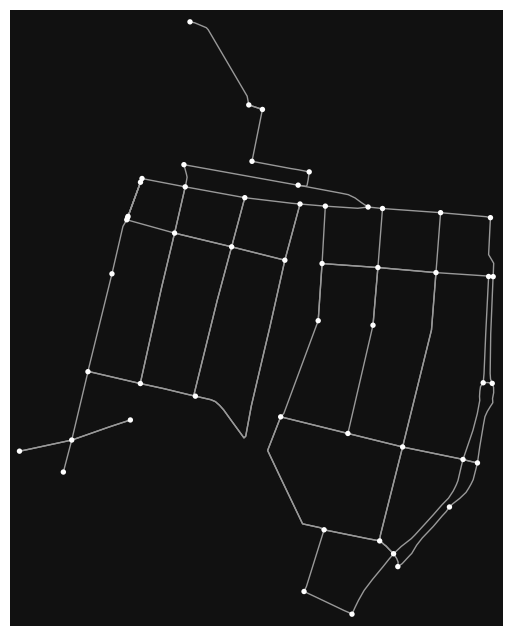

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [131]:
#passo 02: projetar a rede de ruas
ox.plot_graph(graph_drive)

In [132]:
#passo 03: segunda maneira de projetar
nos_drive, ruas_drive = ox.graph_to_gdfs(graph_drive)
#passo 04:plotar a tabela
ruas_drive = ruas_drive.to_crs('EPSG:3006')
ruas_drive.head()

osmid  oneway lanes              name  \
u        v        key                                                           
25688931 30453386 0    [230366401, 881621106]    True     1  Sprängkullsgatan   
25688932 30453193 0                   4767569    True   NaN    Haga Östergata   
         25688931 0                 295995804    True     1  Sprängkullsgatan   
30453191 30453386 0                   4767535   False   NaN          Pilgatan   
         30453196 0                   4767535   False   NaN          Pilgatan   

                           highway maxspeed reversed   length  \
u        v        key                                           
25688931 30453386 0      secondary       50    False   96.329   
25688932 30453193 0    residential       50    False   63.555   
         25688931 0    residential       50    False  128.051   
30453191 30453386 0    residential       50    False   74.242   
         30453196 0    residential       50     True   67.801   

                                                                geometry width  
u        v        key                                                           
25688931 30453386 0    LINESTRING (318872.910 6399123.850, 318869.471...   NaN  
25688932 30453193 0    LINESTRING (318885.193 6399251.506, 318881.948...   NaN  
         25688931 0    LINESTRING (318885.193 6399251.506, 318878.619...   NaN  
30453191 30453386 0    LINESTRING (318772.221 6399050.932, 318775.045...   NaN  
         30453196 0    LINESTRING (318772.221 6399050.932, 318770.689...   NaN

<AxesSubplot:>

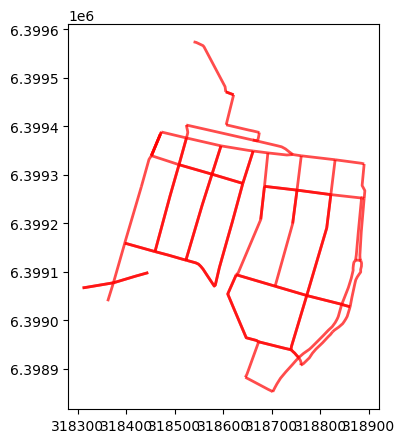

In [133]:
#passo 05: plotar o mapa
ruas_drive.plot(
    color='red',
    edgecolor='black',
    linewidth=2,
    alpha=0.7,
    figsize=(5, 5))

#### Criar um mapa da rede de transporte público
[link](https://wiki.openstreetmap.org/wiki/Tags)

In [134]:
#passo 01: extrair a rede de transportes públicos
#trem de superfície tracks
tp_tram_tracks_tags = {'railway':'tram'}
#trem de superfície paradas
tp_tram_stops_tags = {'railway':'tram_stop'}

In [135]:
#passo 02: projetar as redes de transporte público
#trem de superfície tracks
tram_tracks = ox.geometries_from_place(nome_lugar, tp_tram_tracks_tags)
tram_tracks = tram_tracks.to_crs('EPSG:3006')
#trem de superfície paradas
tram_stops = ox.geometries_from_place(nome_lugar, tp_tram_stops_tags)
tram_stops = tram_stops.to_crs('EPSG:3006')

In [136]:
#passo 03: plotar a tabela
tram_tracks.head()

railway  \
element_type osmid              
way          8043844     tram   
             13857738    tram   
             28483351    tram   
             28639095    tram   
             51831415    tram   

                                                                geometry  \
element_type osmid                                                         
way          8043844   LINESTRING (318491.236 6399392.597, 318476.412...   
             13857738  LINESTRING (319088.761 6399327.014, 319051.337...   
             28483351  LINESTRING (318319.899 6398970.039, 318316.981...   
             28639095  LINESTRING (319144.244 6399143.689, 319014.456...   
             51831415  LINESTRING (318447.190 6399390.944, 318449.872...   

                                                                   nodes  \
element_type osmid                                                         
way          8043844   [1395259871, 129999962, 661183913, 1395259848,...   
             13857738  [1500574993, 1525802341, 6482686244, 688371281...   
             28483351  [31098705, 3409830980, 31098715, 3988534806, 4...   
             28639095  [1500575004, 2087923094, 2087923093, 102718851...   
             51831415  [1395259821, 1395259902, 9722509616, 972250961...   

                        electrified frequency gauge oneway tracks voltage  \
element_type osmid                                                          
way          8043844   contact_line         0  1435    yes      1     750   
             13857738  contact_line         0  1435    yes      1     750   
             28483351  contact_line         0  1435    yes      1     750   
             28639095  contact_line         0  1435    yes      1     750   
             51831415  contact_line         0  1435    yes      1     750   

                      access  
element_type osmid            
way          8043844     NaN  
             13857738    NaN  
             28483351    NaN  
             28639095    NaN  
             51831415    NaN

<AxesSubplot:>

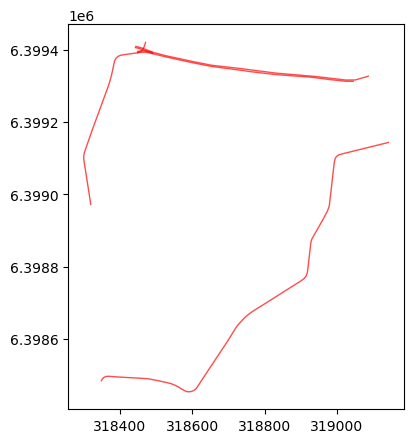

In [137]:
#passo 04: plotar o mapa da rede de transportes públicos
tram_tracks.plot(
    color='red',
    edgecolor='black',
    linewidth=1,
    alpha=0.7,
    figsize=(5, 5))

#### Criar um mapa de edifícios

In [138]:
#passo 01: extrair edifícios
tags = {'building':True} #as tags podem variar de acordo com a tabela
edificios = ox.geometries_from_place (nome_lugar, tags)

In [139]:
#passo 02: projetar edifícios
edificios = edificios[edificios.geom_type == 'Polygon']

In [140]:
#passo 03: plotar o mapa
edificios = edificios.to_crs('EPSG:3006')
edificios.head()

access addr:city addr:country addr:housenumber  \
element_type osmid                                                     
way          24059808    NaN  Göteborg           SE              2 A   
             30392091    NaN       NaN          NaN              NaN   
             30392092    NaN       NaN          NaN              NaN   
             32871212    NaN       NaN          NaN              NaN   
             48482959    NaN       NaN          NaN              NaN   

                      addr:street check_date  \
element_type osmid                             
way          24059808   Vasagatan        NaN   
             30392091         NaN        NaN   
             30392092         NaN        NaN   
             32871212         NaN        NaN   
             48482959         NaN        NaN   

                                                    name      opening_hours  \
element_type osmid                                                            
way          24059808  Samhällsvetenskapliga biblioteket                NaN   
             30392091                                NaN                NaN   
             30392092                                NaN                NaN   
             32871212                     Skansen Kronan  We-Fr 10:00-14:00   
             48482959                         Vaktstugan                NaN   

                                              operator payment:mastercard  \
element_type osmid                                                          
way          24059808  Göteborgs universitetsbibliotek                NaN   
             30392091                              NaN                NaN   
             30392092                              NaN                NaN   
             32871212                              NaN                NaN   
             48482959                              NaN                NaN   

                       ... delivery drive_through toilets:wheelchair  \
element_type osmid     ...                                             
way          24059808  ...      NaN           NaN                NaN   
             30392091  ...      NaN           NaN                NaN   
             30392092  ...      NaN           NaN                NaN   
             32871212  ...      NaN           NaN                NaN   
             48482959  ...      NaN           NaN                NaN   

                      architect roof:shape location power substation ways type  
element_type osmid                                                              
way          24059808       NaN        NaN      NaN   NaN        NaN  NaN  NaN  
             30392091       NaN        NaN      NaN   NaN        NaN  NaN  NaN  
             30392092       NaN        NaN      NaN   NaN        NaN  NaN  NaN  
             32871212       NaN        NaN      NaN   NaN        NaN  NaN  NaN  
             48482959       NaN        NaN      NaN   NaN        NaN  NaN  NaN  

[5 rows x 60 columns]

<AxesSubplot:>

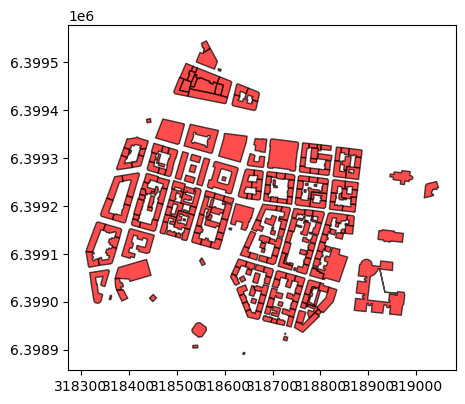

In [141]:
#passo 04: plotar mapa de edifcícios
edificios.plot(
    color='red',
    edgecolor='black',
    linewidth=1,
    alpha=0.7,
    figsize=(5, 5))

## Parte 5

### Análise de Rotas

In [142]:
#origin_point = (latitude_origin, longitude_origin)
#destination_point = (latitude_destination, longitude_destination)

#rota = ox.shortest_path(ruas_drive, origin_point, destination_point)

## Parte 6

### Exportar os dados

##### shapefile

In [143]:
#transformar em geodataframe
edificios = gpd.GeoDataFrame(edificios, geometry=geometry, crs='EPSG:3006')
#exporte para shapefile
edificios.to_file('caminho/para/seu/arquivo/nome_do_arquivo.shp')

NameError: name 'geometry' is not defined

##### GeoJson

In [ ]:
#transformar em geodataframe
edificios = gpd.GeoDataFrame(edificios, geometry=geometry, crs='EPSG:3006')
#exporte para shapefile
edificios.to_file('caminho/para/seu/arquivo/nome_do_arquivo.geojson', , driver='GeoJSON')

##### GeoPackage

In [ ]:
#transformar em geodataframe
edificios = gpd.GeoDataFrame(edificios, geometry=geometry, crs='EPSG:3006')
poligono_area = gpd.GeoDataFrame(poligono_area, geometry=geometry, crs='EPSG:3006')
#exporte para shapefile
edificios.to_file('caminho/para/seu/arquivo/nome_do_arquivo.gpkg', layer='edificios', driver='GPKG')
poligono_area.to_file('caminho/para/seu/arquivo/nome_do_arquivo.gpkg', layer='poligono_area', driver='GPKG')

## Parte 7

#### Limitações

#### O OSMnx tem limitações relacionadas à dependência dos dados do OpenStreetMap,
##### - resolução espacial;
##### - atualizações do OpenStreetMap;
##### - tratamento de grandes áreas;
##### - recuperação de tipos específicos de dados;
##### - geometrias simplificadas;
##### - limitações nos algoritmos de rotas.


## Parte 8

#### Exercício: vocês fazerem seus próprios mapas